In [1]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
from charon import profile
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_generator, Spectra_interpolation, Flux_generator, J_interpolation, Flux_interpolation, Signal_PDF, Background_PDF, Background_cut
from ipynb.fs.full.func_plot_histo import plot_projections

In [2]:
sys.path.append("/home/dvaldenaire/Python/Analysis/DMfit/DMfit")
from modeling import PdfBase, Model, Parameter
from data_DM import DataSet
from llh import LikelihoodRatioTest

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


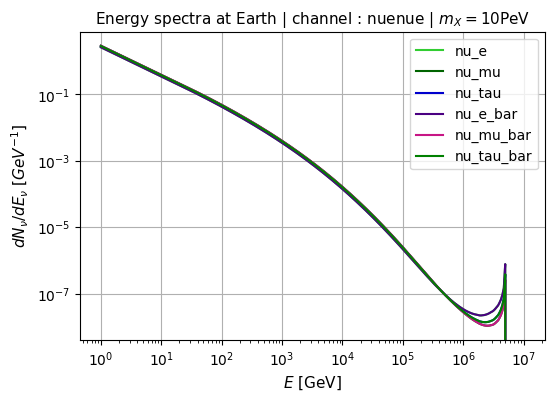

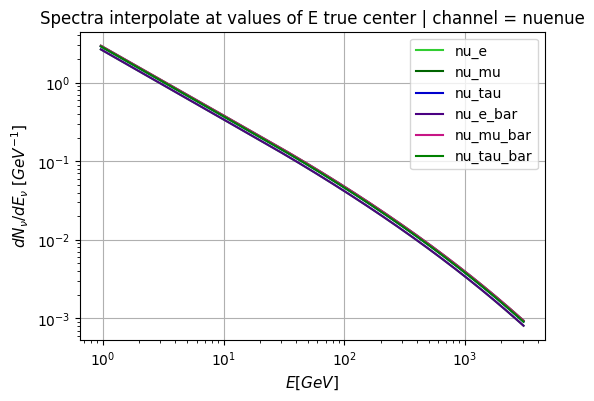

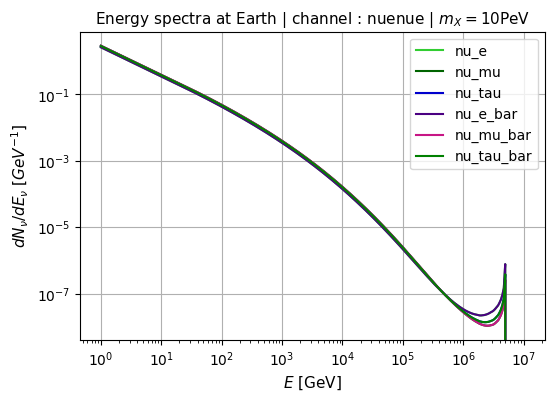

In [3]:
Reco_rate_NFW = Signal_PDF(mass=1e7, channel='nuenue',process='decay',galactic_profile=profile.NFW, extrapolation=True, normalize=True)

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


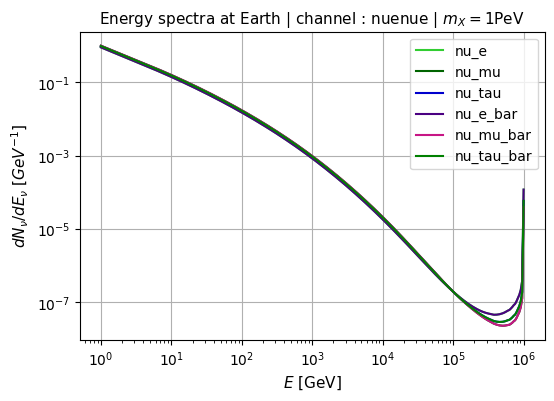

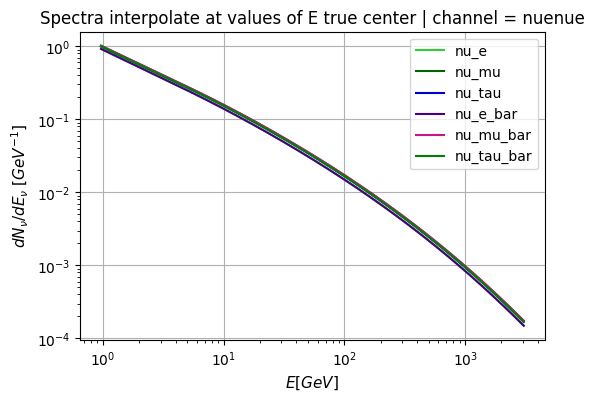

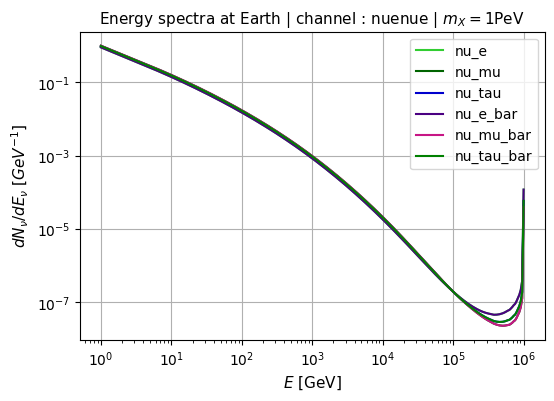

In [4]:
Reco_rate_NFW_ann = Signal_PDF(mass=1e6, channel='nuenue',process='ann',galactic_profile=profile.NFW, extrapolation=True, normalize=True)

In [5]:
Background = Background_cut()

In [ ]:
BackgroundFluctuate = np.random.poisson(Background[0])

In [6]:
SignalPDF_decay = PdfBase(Reco_rate_NFW.flatten()/np.sum(Reco_rate_NFW), name='Signal PDF decay')

In [7]:
SignalPDF_ann = PdfBase(Reco_rate_NFW_ann.flatten()/np.sum(Reco_rate_NFW_ann), name='Signal PDF ann')

In [16]:
BackgndPDF = PdfBase((Background.flatten())/np.sum(Background), name='Background PDF')

In [ ]:
BackgroundFluctPDF = PdfBase((BackgroundFluctuate.flatten())/np.sum(BackgroundFluctuate), name='Background Poisson PDF')

In [17]:
signal_fit = Parameter(value=0.5, limits=(0,1), fixed=False, name='signal fit')
signal_inj = Parameter(value=0., limits=(0,1), fixed=True, name='signal inj')

In [18]:
# decay
modelH1_dec = signal_fit*SignalPDF_decay + (1-signal_fit)*BackgndPDF
modelH0_dec = signal_inj*SignalPDF_decay + (1-signal_inj)*BackgndPDF
pseudo_data_dec = signal_inj*SignalPDF_decay + (1-signal_inj)*BackgndPDF
lr_dec = LikelihoodRatioTest(model = modelH1_dec, null_model = pseudo_data_dec)

Parameter signal fit already exists in the model, it won't be added again
Parameter signal inj already exists in the model, it won't be added again
Parameter signal inj already exists in the model, it won't be added again


In [19]:
# ann
modelH1_ann = signal_fit*SignalPDF_ann + (1-signal_fit)*BackgndPDF
modelH0_ann = signal_inj*SignalPDF_ann + (1-signal_inj)*BackgndPDF
pseudo_data_ann = signal_inj*SignalPDF_ann + (1-signal_inj)*BackgndPDF
lr_ann = LikelihoodRatioTest(model = modelH1_ann, null_model = pseudo_data_ann)

Parameter signal fit already exists in the model, it won't be added again
Parameter signal inj already exists in the model, it won't be added again
Parameter signal inj already exists in the model, it won't be added again


In [ ]:
# Fluctuations : 
modelH1_fluc = signal_fit*SignalPDF_ann + (1-signal_fit)*BackgroundFluctPDF
modelH0_fluc = signal_inj*SignalPDF_ann + (1-signal_inj)*BackgroundFluctPDF
pseudo_data_fluc = signal_inj*SignalPDF_ann + (1-signal_inj)*BackgroundFluctPDF
lr = LikelihoodRatioTest(model = modelH1_fluc, null_model = pseudo_data_fluc)

### Signal injection fit : 

In [38]:
#decay
ds = DataSet()
ksi = np.linspace(0.004,0.010,50)
signal_frac_sample_dec = []
for s in ksi:
    signal_fraction = []
    pseudo_data_dec.parameters["signal inj"].value = s #change the signal injection
    for j in range(200):
        ds.sample(np.sum(Background), pseudo_data_dec)
        lr = LikelihoodRatioTest(model = modelH1_dec, null_model = modelH0_dec)
        lr.data = ds #inject data in the likelihood model
        lr.fit('H1')
        signal_fraction.append(lr.models['H1'].parameters['signal fit'].value)
    signal_frac_sample_dec.append(signal_fraction)

In [29]:
#ann
ksi = np.linspace(0.004,0.010,50)
signal_frac_sample_ann = []
for s in ksi:
    signal_fraction = []
    pseudo_data_ann.parameters["signal inj"].value = s #change the signal injection
    for j in range(200):
        ds.sample(np.sum(Background), pseudo_data_ann)
        lr = LikelihoodRatioTest(model = modelH1_ann, null_model = modelH0_ann)
        lr.data = ds #inject data in the likelihood model
        lr.fit('H1')
        signal_fraction.append(lr.models['H1'].parameters['signal fit'].value)
    signal_frac_sample_ann.append(signal_fraction)

In [ ]:
#fluctuations
ksi = np.linspace(0.004,0.010,50)
signal_frac_sample_fluc = []
for s in ksi:
    signal_fraction = []
    pseudo_data_fluc.parameters["signal inj"].value = s #change the signal injection
    for j in range(200):
        ds.sample(len(Background_sample), pseudo_data_fluc)
        lr = LikelihoodRatioTest(model = modelH1_fluc, null_model = modelH0_fluc)
        lr.data = ds #inject data in the likelihood model
        lr.fit('H1')
        signal_fraction.append(lr.models['H1'].parameters['signal fit'].value)
    signal_frac_sample_fluc.append(signal_fraction)

In [31]:
median_ann, percentile68_ann, low98_ann = [],[],[]
for i in range(len(ksi)):
    median_ann.append(np.median(signal_frac_sample_ann[i]))
    percentile68_ann.append(np.percentile(signal_frac_sample_ann[i],84.1))
    low98_ann.append(np.percentile(signal_frac_sample_ann[i],15.9))

In [39]:
median_dec, percentile68_dec, low98_dec = [],[],[]
for i in range(len(ksi)):
    median_dec.append(np.median(signal_frac_sample_dec[i]))
    percentile68_dec.append(np.percentile(signal_frac_sample_dec[i],84.1))
    low98_dec.append(np.percentile(signal_frac_sample_dec[i],15.9))

In [ ]:
median_fluc, percentile68_fluc, low98_fluc = [],[],[]
for i in range(len(ksi)):
    median_fluc.append(np.median(signal_frac_sample_fluc[i]))
    percentile68_fluc.append(np.percentile(signal_frac_sample_fluc[i],84.1))
    low98_fluc.append(np.percentile(signal_frac_sample_fluc[i],15.9))

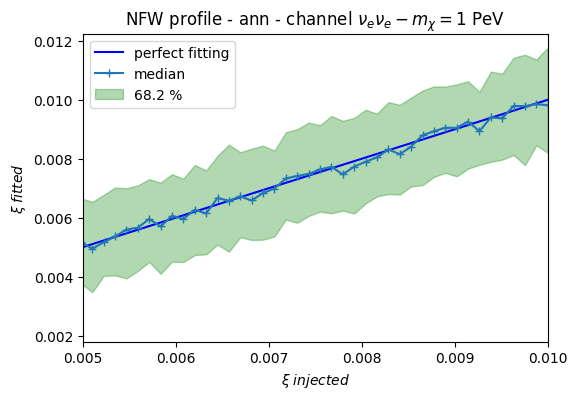

In [33]:
plt.figure(figsize=(6,4))
plt.plot(ksi,ksi,'b-', label = 'perfect fitting')
plt.plot(ksi,median_ann,marker='+',label='median')
plt.xlim(0.005,0.010)
plt.title(r'NFW profile - ann - channel $\nu_e\nu_e - m_\chi = 1$ PeV')
plt.xlabel(r'$\xi \; injected$')
plt.ylabel(r'$\xi \; fitted$')
plt.fill_between(ksi, low98_ann, percentile68_ann, alpha=0.3, color='green', label = '68.2 %')
plt.legend(loc=2)

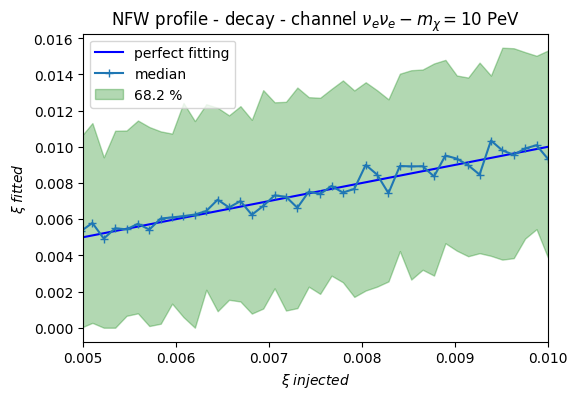

In [40]:
plt.figure(figsize=(6,4))
plt.plot(ksi,ksi,'b-', label = 'perfect fitting')
plt.plot(ksi,median_dec,marker='+',label='median')
plt.xlim(0.005,0.010)
plt.title(r'NFW profile - decay - channel $\nu_e\nu_e - m_\chi = 10$ PeV')
plt.xlabel(r'$\xi \; injected$')
plt.ylabel(r'$\xi \; fitted$')
plt.fill_between(ksi, low98_dec, percentile68_dec, alpha=0.3, color='green', label = '68.2 %')
plt.legend(loc=2)

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(ksi,ksi,'b-', label = 'perfect fitting')
plt.plot(ksi,median_fluc,marker='+',label='median')
plt.xlim(0.005,0.010)
plt.title(r'NFW profile - ann + Poisson - channel $\nu_e\nu_e - m_\chi = 1$ PeV')
plt.xlabel(r'$\xi \; injected$')
plt.ylabel(r'$\xi \; fitted$')
plt.fill_between(ksi, low98_fluc, percentile68_fluc, alpha=0.3, color='green', label = '68.2 %')
plt.legend(loc=2)